<font size="6">Exploration des données brutes </font>

### Librairies utilisées

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

On concatène tous les data sets

<font size="6">Analyse des données nettoyées </font>

### Importation

In [17]:
clean_data=pd.read_csv("all_final.csv",sep=",",decimal=".",index_col=0)

clean_data.head()

C:\Users\cbarailler\AppData\Local\Temp\ipykernel_10908\3901936525.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  clean_data=pd.read_csv("all_final.csv",sep=",",decimal=".",index_col=0)


,No disposition,Nature mutation,Valeur fonciere,Code postal,Commune,Code departement,Nombre de lots,Code type local,Surface reelle bati,Nombre pieces principales,Nature culture,Surface terrain,jour,mois,annee
2,1,Vente,239300.0,1250.0,NIVIGNE ET SURAN,1,0,1.0,163.0,4.0,S,949.0,4,1,2018
3,1,Vente,239300.0,1250.0,NIVIGNE ET SURAN,1,0,1.0,163.0,4.0,AG,420.0,4,1,2018
7,1,Vente,90000.0,1380.0,SAINT-CYR-SUR-MENTHON,1,0,1.0,150.0,3.0,S,347.0,4,1,2018
22,1,Vente,47700.0,1240.0,LENT,1,0,3.0,0.0,0.0,S,640.0,8,1,2018
23,1,Vente,47700.0,1240.0,LENT,1,0,1.0,225.0,5.0,S,640.0,8,1,2018


In [18]:
print(clean_data.dtypes)

No disposition                 int64
Nature mutation               object
Valeur fonciere              float64
Code postal                  float64
Commune                       object
Code departement              object
Nombre de lots                 int64
Code type local              float64
Surface reelle bati          float64
Nombre pieces principales    float64
Nature culture                object
Surface terrain              float64
jour                           int64
mois                           int64
annee                          int64
dtype: object


In [19]:
# Supprimez le ".0" des valeurs dans la colonne "Code_type_local" en les convertissant en chaînes de caractères
clean_data['Code type local'] = clean_data['Code type local'].astype(str).str.replace(r'\.0', '', regex=True)

# Convertir  la colonne "Code_type_local" en variable catégorielle
clean_data['Code type local'] = clean_data['Code type local'].astype('category')


In [20]:
#Passer le Code_Postal en object
clean_data['Code postal']=clean_data['Code postal'].astype(str)
print(clean_data.dtypes)

No disposition                  int64
Nature mutation                object
Valeur fonciere               float64
Code postal                    object
Commune                        object
Code departement               object
Nombre de lots                  int64
Code type local              category
Surface reelle bati           float64
Nombre pieces principales     float64
Nature culture                 object
Surface terrain               float64
jour                            int64
mois                            int64
annee                           int64
dtype: object


Nature mutation à garder?
N° disposition?

### OPEN DATA

Ajout du code_commune_INSEE

In [21]:
com_dep_region=pd.read_csv("communes-departement-region.csv",sep=",",decimal=".")
com_dep_region.dtypes

code_commune_INSEE       object
nom_commune_postal       object
code_postal               int64
libelle_acheminement     object
ligne_5                  object
latitude                float64
longitude               float64
code_commune            float64
article                  object
nom_commune              object
nom_commune_complet      object
code_departement         object
nom_departement          object
code_region             float64
nom_region               object
dtype: object

In [22]:
#On passe le code_postal en chaîne de caractères
com_dep_region['code_postal']=com_dep_region['code_postal'].astype(str)
print(com_dep_region.dtypes)

code_commune_INSEE       object
nom_commune_postal       object
code_postal              object
libelle_acheminement     object
ligne_5                  object
latitude                float64
longitude               float64
code_commune            float64
article                  object
nom_commune              object
nom_commune_complet      object
code_departement         object
nom_departement          object
code_region             float64
nom_region               object
dtype: object


In [23]:
clean_data = pd.merge(clean_data, com_dep_region[['code_postal', 'code_commune_INSEE']], left_on='Code postal', right_on='code_postal', how='left')
# Supprimer la colonne redondante (code_postal)
clean_data.drop(columns=['code_postal'], inplace=True)
print(clean_data.dtypes)

No disposition                  int64
Nature mutation                object
Valeur fonciere               float64
Code postal                    object
Commune                        object
Code departement               object
Nombre de lots                  int64
Code type local              category
Surface reelle bati           float64
Nombre pieces principales     float64
Nature culture                 object
Surface terrain               float64
jour                            int64
mois                            int64
annee                           int64
code_commune_INSEE             object
dtype: object


Ajout du prix moyen au m² par code postaux

In [24]:
prix_m2_data = pd.read_csv("dvf-communes-2019.csv",sep=";")
# print(prix_m2_data.head())
# print(prix_m2_data.dtypes)
prix_m2_data['INSEE_COM'].unique()

array(['32216', '47033', '32009', ..., '31123', '31133', '31213'],
      dtype=object)

In [25]:
# Fusionner les données en fonction de la colonne "Code_postal"
clean_data = pd.merge(clean_data, prix_m2_data[['INSEE_COM', 'PrixMoyen_M2']], left_on='code_commune_INSEE', right_on='INSEE_COM', how='left')
# Supprimer la colonne redondante (INSEE_COM)
clean_data.drop(columns=['INSEE_COM'], inplace=True)
print(clean_data.dtypes)


No disposition                  int64
Nature mutation                object
Valeur fonciere               float64
Code postal                    object
Commune                        object
Code departement               object
Nombre de lots                  int64
Code type local              category
Surface reelle bati           float64
Nombre pieces principales     float64
Nature culture                 object
Surface terrain               float64
jour                            int64
mois                            int64
annee                           int64
code_commune_INSEE             object
PrixMoyen_M2                  float64
dtype: object


In [47]:
clean_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3466893 entries, 0 to 3466892
Data columns (total 17 columns):
 #   Column                     Dtype   
---  ------                     -----   
 0   No disposition             int64   
 1   Nature mutation            object  
 2   Valeur fonciere            float64 
 3   Code postal                object  
 4   Commune                    object  
 5   Code departement           object  
 6   Nombre de lots             int64   
 7   Code type local            category
 8   Surface reelle bati        float64 
 9   Nombre pieces principales  float64 
 10  Nature culture             object  
 11  Surface terrain            float64 
 12  jour                       int64   
 13  mois                       int64   
 14  annee                      int64   
 15  code_commune_INSEE         object  
 16  PrixMoyen_M2               float64 
dtypes: category(1), float64(5), int64(5), object(6)
memory usage: 426.5+ MB


In [46]:
# Exportez le DataFrame en tant que fichier CSV
#clean_data.to_csv('all_with_open_data.csv', index=False)

### Analyse des caractéristiques par année

Pour commencer, nous voulons voir l'évolution du nombre de ventes par année

Nous allons maintenant grouper le nombre de vente par année

In [29]:
ventes_par_annee = clean_data.groupby('annee')['No disposition'].count()
print(ventes_par_annee)

annee
2018     720891
2019     792924
2020     813181
2021    1139897
Name: No disposition, dtype: int64


In [30]:
ventes_par_annee.index

Index([2018, 2019, 2020, 2021], dtype='int64', name='annee')

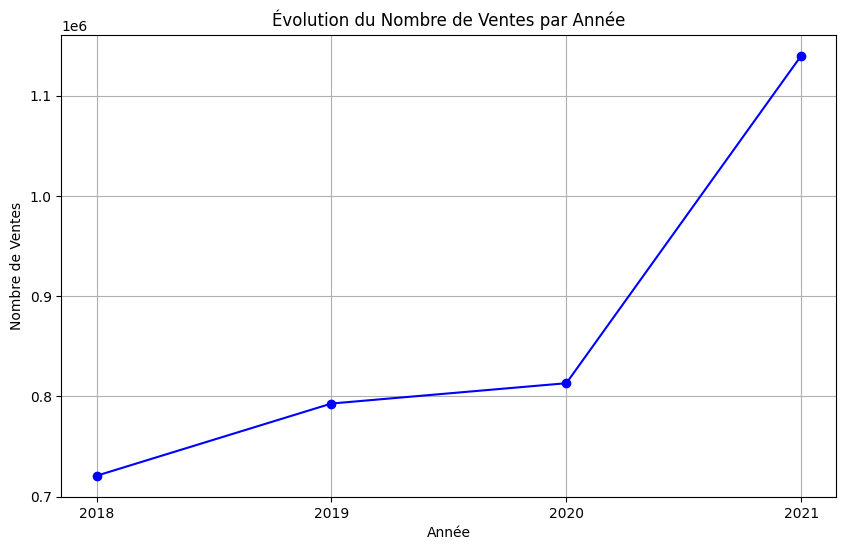

In [31]:
plt.figure(figsize=(10, 6))
plt.plot(ventes_par_annee.index, ventes_par_annee.values, marker='o', linestyle='-', color='b')
plt.title('Évolution du Nombre de Ventes par Année')
plt.xlabel('Année')
plt.ylabel('Nombre de Ventes')
plt.grid(True)
#On affiche uniquement les années en abscisse 
plt.xticks(ventes_par_annee.index)
plt.show()

Nous voulons maintenant établir un classement de chaque commune par année en fonction de leur nombre de vente

In [32]:
#On regroupe le nombre de vente par année et par commune
ventes_par_annee_commune = clean_data.groupby(['annee', 'Commune']).size().reset_index(name='Nombre_de_ventes')
print(ventes_par_annee_commune)

        annee               Commune  Nombre_de_ventes
0        2018                  AAST                 2
1        2018            ABAINVILLE                 9
2        2018             ABANCOURT                10
3        2018             ABAUCOURT                 5
4        2018  ABAUCOURT-HAUTECOURT                 1
...       ...                   ...               ...
118108   2021                  ZOZA                 5
118109   2021            ZUDAUSQUES                19
118110   2021             ZUTKERQUE                36
118111   2021             ZUYDCOOTE                21
118112   2021             ZUYTPEENE                21

[118113 rows x 3 columns]


In [33]:
# Trier les données dans chaque groupe par ordre décroissant du nombre de ventes
ventes_par_annee_commune = ventes_par_annee_commune.sort_values(['annee', 'Nombre_de_ventes'], ascending=[True, False])

# Récupérer les années
annees = ventes_par_annee_commune['annee'].unique()

# Récupérer le top et flop pour chaque commune et année
top_flop_communes = {}

for annee in annees:
    top_flop_communes[annee] = {
        'Top': ventes_par_annee_commune[ventes_par_annee_commune['annee'] == annee].head(1),
        'Flop': ventes_par_annee_commune[ventes_par_annee_commune['annee'] == annee].tail(1)
    }


In [34]:
# Afficher le top et le flop pour chaque année
for annee in annees:
    print(f"Année {annee}:")
    
    # Afficher le top des communes
    print("Top communes:")
    for idx, row in top_flop_communes[annee]['Top'].iterrows():
        print(f"Commune: {row['Commune']}, Nombre de ventes: {row['Nombre_de_ventes']}")
    
    # Afficher le flop des communes
    print("Flop communes:")
    for idx, row in top_flop_communes[annee]['Flop'].iterrows():
        print(f"Commune: {row['Commune']}, Nombre de ventes: {row['Nombre_de_ventes']}")
    
    print("\n")

Année 2018:
Top communes:
Commune: TOULOUSE, Nombre de ventes: 1881
Flop communes:
Commune: ZOZA, Nombre de ventes: 1


Année 2019:
Top communes:
Commune: LILLE, Nombre de ventes: 1997
Flop communes:
Commune: ZILIA, Nombre de ventes: 1


Année 2020:
Top communes:
Commune: TOULOUSE, Nombre de ventes: 1937
Flop communes:
Commune: ZOZA, Nombre de ventes: 1


Année 2021:
Top communes:
Commune: TOULOUSE, Nombre de ventes: 2576
Flop communes:
Commune: ZINCOURT, Nombre de ventes: 1




### Corrélations

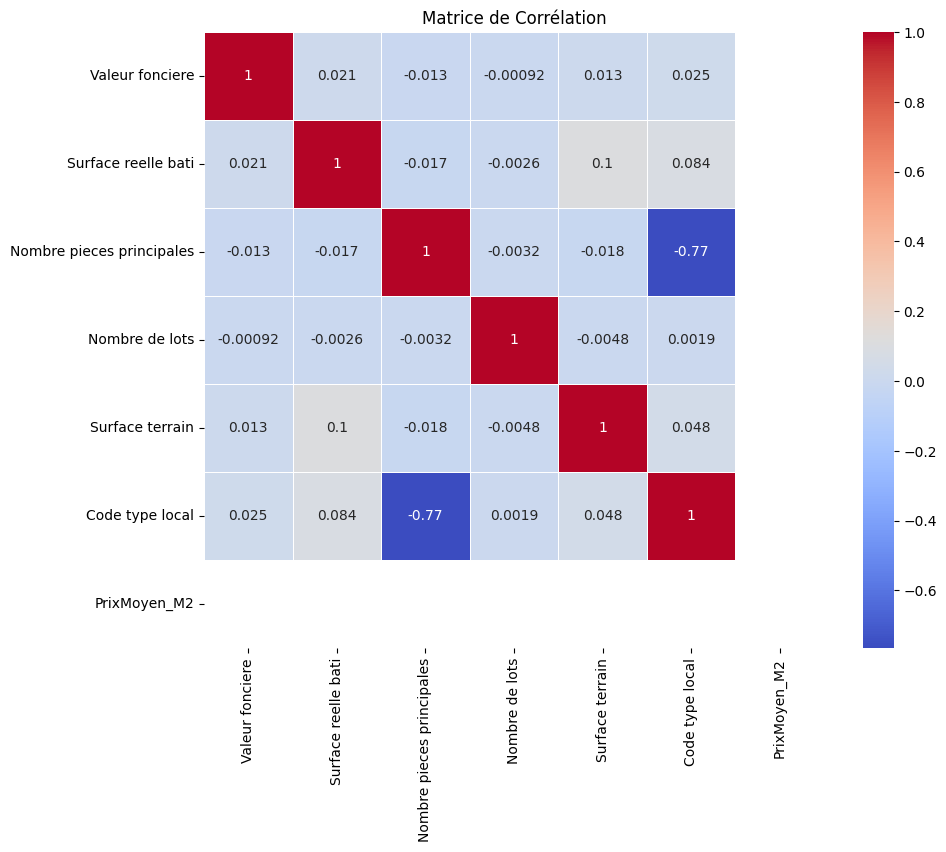

In [36]:
# Sélection des colonnes pertinentes
var_utiles = ['Valeur fonciere', 'Surface reelle bati', 'Nombre pieces principales','Nombre de lots','Surface terrain','Code type local','PrixMoyen_M2']
data_corr = clean_data[var_utiles]
matrice_correlation = data_corr.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(matrice_correlation, annot=True, cmap='coolwarm', linewidths=.5)
plt.title('Matrice de Corrélation')
plt.show()


Les corrélations sont très faibles entre les variables et la valeur foncière. Si on effectue une régression linéaire pour prédire la valeur foncière en fonction de ces variables, il est peu probable que celles-ci aient un pouvoir prédictif significatif.

### Diagramme de dispersion

Nous voulons visualiser la répartition des données en fonction des types locaux

In [38]:
# Sélection de données pertinentes
colonnes_pertinentes = ['Valeur fonciere', 'Nombre pieces principales', 'Code type local']
data_disp = clean_data[colonnes_pertinentes]




C:\Users\cbarailler\AppData\Local\Temp\ipykernel_10908\163110962.py:5: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  for groupe, groupe_data in data_disp.groupby('Code type local'):


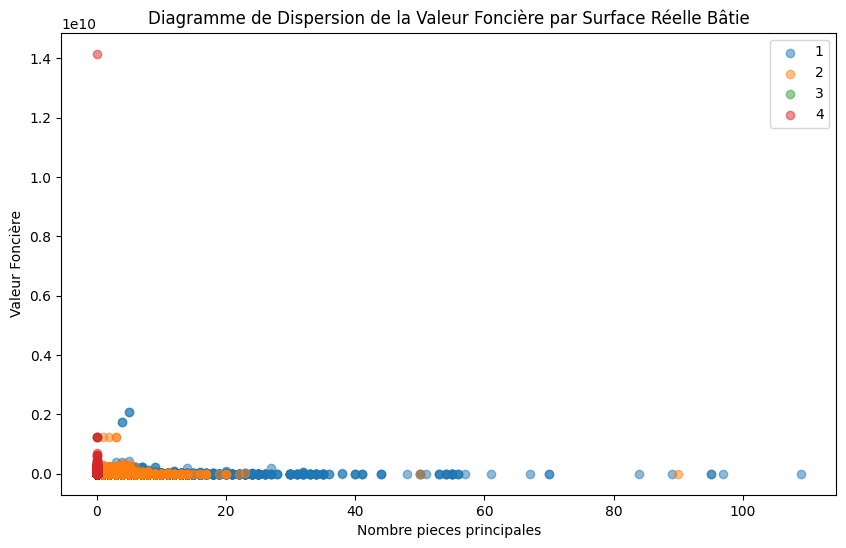

In [40]:
#Créez une figure et des sous-graphiques
plt.figure(figsize=(10, 6))

# Parcourez les groupes (types locaux) et créez un diagramme de dispersion pour chaque groupe
for groupe, groupe_data in data_disp.groupby('Code type local'):
    plt.scatter(groupe_data['Nombre pieces principales'], groupe_data['Valeur fonciere'], label=groupe, alpha=0.5)

# Ajoutez des étiquettes et une légende
plt.title('Diagramme de Dispersion de la Valeur Foncière par Surface Réelle Bâtie')
plt.xlabel('Nombre pieces principales')
plt.ylabel('Valeur Foncière')
plt.legend()

# Affichez le diagramme de dispersion
plt.show()


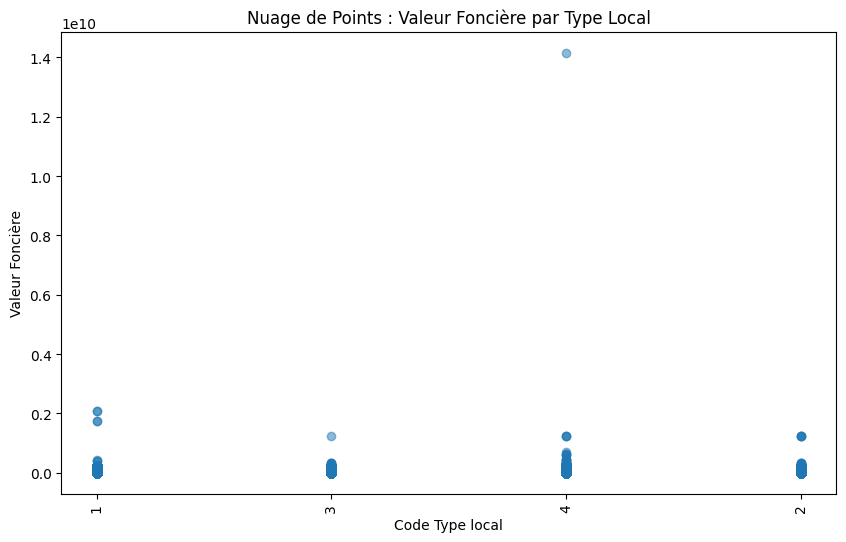

In [44]:
plt.figure(figsize=(10, 6))
plt.scatter(clean_data['Code type local'], clean_data['Valeur fonciere'], alpha=0.5)
plt.title('Nuage de Points : Valeur Foncière par Type Local')
plt.xlabel('Code Type local')
plt.ylabel('Valeur Foncière')
plt.xticks(rotation=90)  # Rotation des étiquettes de l'axe des x pour plus de lisibilité
plt.show()


### Outliers

In [ ]:
# Q1 = clean_data['Valeur_fonciere'].quantile(0.25)
# Q3 = clean_data['Valeur_fonciere'].quantile(0.75)
# IQR = Q3 - Q1

# # Déterminer les bornes supérieure et inférieure pour les valeurs aberrantes
# bornes_inferieure = Q1 - 1.5 * IQR
# bornes_superieure = Q3 + 1.5 * IQR

# # Identifier les outliers
# outliers = clean_data[(clean_data['Valeur_fonciere'] < bornes_inferieure) | (clean_data['Valeur_fonciere'] > bornes_superieure)]
# print(outliers.shape)

(108977, 15)


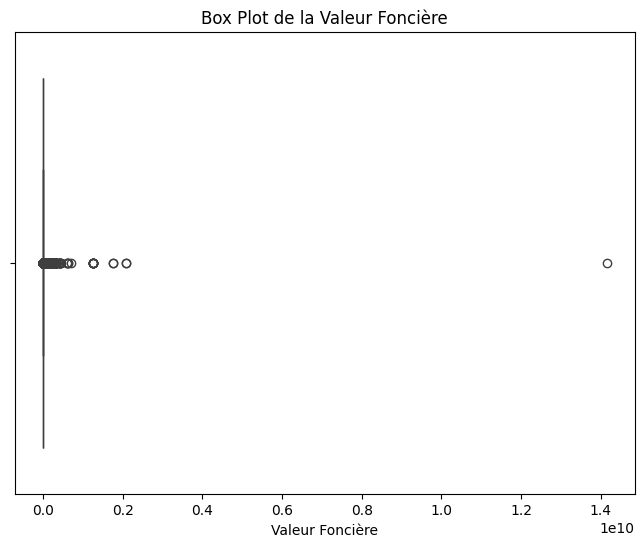

In [45]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=clean_data['Valeur fonciere'])
plt.title('Box Plot de la Valeur Foncière')
plt.xlabel('Valeur Foncière')
plt.show()
